# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Aggregate inflation in Denmark

We load the data from statistik banken

In [17]:
#%pip install git+https://github.com/alemartinello/dstapi
#%pip install fredapi

In [18]:
# APIs
from fredapi import Fred
from dstapi import DstApi

PRIS113 = DstApi('PRIS113') 

### 1-1 Basics

In [ ]:
params = {
    'table': 'Pris113',
    'format': 'BULK',
    'lang': 'en',
    'variables': [
        {'code': 'TYPE', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']}
    ]
}

In [ ]:
metro.get_data(params=params)

In [ ]:
#make TID a date field
df['TID'] = pd.to_datetime(df['TID'], format='%YM%m').dt.date

In [ ]:
#Sorter data by TID
df = df.sort_values(by='TID').reset_index(drop=True)

In [ ]:
# Index the CPI to January 2020 = 100
scaling_factor = round(100 / df.loc[df['TID'] == pd.to_datetime('2020-01-01').date(), 'INDHOLD'].values[0], 2)
df['CPI_Indexed'] = df['INDHOLD'] * scaling_factor

In [ ]:
# the month-to-month inflation rate
df['Inflation_Rate'] = df['INDHOLD'].pct_change().round(3)

In [ ]:
# the 12-month inflation rate
df['Inflation_Rate_12M'] = (df['INDHOLD'] / df['INDHOLD'].shift(12) - 1).round(3)
display(df)

In [ ]:
from datetime import date
import matplotlib.pyplot as plt

# Filter 
high_inflation_df = df[(df['TID'] >= date(2015, 1, 1)) & (df['TID'] <= date(2024, 12, 31))]

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(high_inflation_df['TID'], high_inflation_df['Inflation_Rate_12M'], marker='o', label='12M Inflation Rate')
plt.title('12-Month Inflation Rate (2015-2023)')
plt.xlabel('Date')
plt.ylabel('12-Month Inflation Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 1-2 Instantaneous inflation

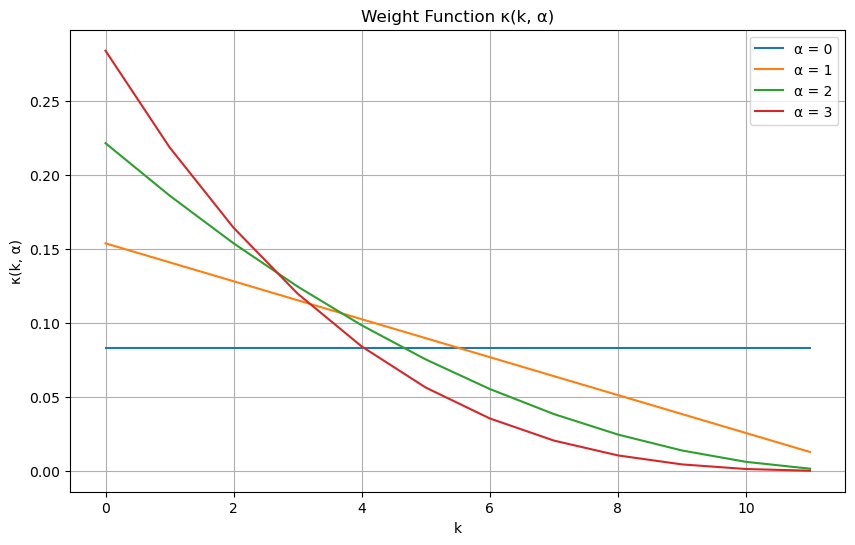

In [19]:
# Step 1: Define and plot κ(k, α)
k_values = np.arange(12)
alpha_values = [0, 1, 2, 3]
T = 12

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    kappa = (T - k_values) ** alpha / np.sum((T - np.arange(T)) ** alpha)
    plt.plot(k_values, kappa, label=f'α = {alpha}')
plt.xlabel('k')
plt.ylabel('κ(k, α)')
plt.title('Weight Function κ(k, α)')
plt.legend()
plt.grid()
plt.show()

## Question 2

We process the data by ...

In [27]:
data = dataproject.load_data()


In [28]:
data = dataproject.process_data(data)

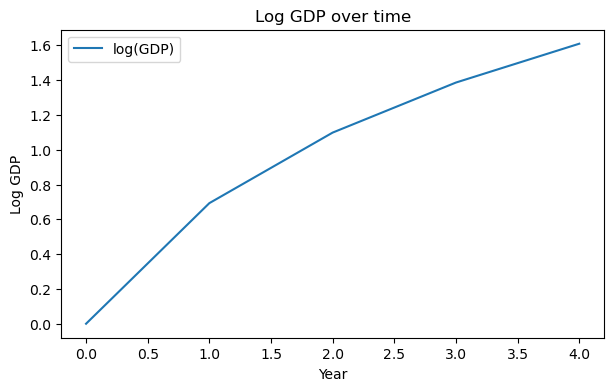

In [29]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend();

We find that that ...